In [1]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

Thi

In [2]:
### choo code

# igvf <- read_tsv("igvf_merged.csv")
# igvf

# # ambient 0%
# igvf_mat_1 <- igvf[ , -1] %>% as.matrix %>% `row.names<-`(colnames(igvf_mat_1))
# #ambient 20%
# igvf_mat_2 <- igvf[ , -1] %>% as.matrix %>% `row.names<-`(colnames(igvf_mat_1))


# ambient_df <-
#   data.frame(rep(c("0%", "10%"), each = nrow(igvf_mat_1)))


# Heatmap(cbind(igvf_mat_1, igvf_mat_2),
#         name = "Droplet Type\nAccuracy",
#         column_split = ambient_df,
#         col = colorRamp2(c(0.5, 0.75, 1), c("navy", "white", "maroon")),
#         cluster_rows = FALSE, cluster_columns = FALSE)

In [13]:
projdir <- '/u/project/cluo/terencew/igvf/pilot/multiome/'

In [14]:
igvf_merged = read.table(paste0(projdir, 'csv/final_figures/figure4/igvf_overlap_merged.csv'),
                             sep='\t', header=1, row.names=1)
adelus_merged = read.table(paste0(projdir, 'csv/final_figures/figure4/adelus_overlap_merged.csv'),
                             sep='\t', header=1, row.names=1)

In [5]:
head(igvf_merged)

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
demuxlet,1.0000000,0.7580090,0.8898908,0.8703807,0.8063744,0.7551890,0.8390006,0.8375250,0.8877922
freemuxlet,0.8007017,1.0000000,0.7980785,0.8340493,0.8688068,0.7933567,0.8311309,0.8720202,0.7282356
vireo,0.9261567,0.8350657,1.0000000,0.9462570,0.8461160,0.7944716,0.8984818,0.8963505,0.9158606
vireo_nogenos,0.9097288,0.8609371,0.9686854,1.0000000,0.8668066,0.8073581,0.9062531,0.9283864,0.8759550
scsplit,0.6926911,0.7139391,0.6974784,0.6996754,1.0000000,0.8160803,0.8438207,0.8748729,0.7915533
scsplit_nogenos,0.7847985,0.8901203,0.8196216,0.8358527,0.7634194,1.0000000,0.8146703,0.8164082,0.7508607


In [6]:
head(adelus_merged)

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
demuxlet,1.0000000,0.7120252,0.7882447,0.7747791,0.6792137,0.6773387,0.7618249,0.7632170,0.7896367
freemuxlet,0.8312832,1.0000000,0.8596347,0.8990654,0.8959405,0.8909974,0.9265646,0.9241499,0.8330729
vireo,0.9309395,0.8778444,1.0000000,0.9302293,0.8007443,0.7976762,0.9190364,0.9212806,0.9203148
vireo_nogenos,0.8997756,0.8792932,0.9465640,1.0000000,0.8319934,0.8289821,0.9466492,0.9515639,0.9029289
scsplit,0.8074487,0.9343485,0.8458851,0.8457998,1.0000000,0.9220477,0.8497770,0.8490100,0.7746371
scsplit_nogenos,0.8106304,0.9383824,0.8499759,0.8500611,0.9593193,1.0000000,0.8450044,0.8436124,0.7727621


In [15]:
gex_methods <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                               'scsplit', 'scsplit_nogenos',
                               'souporcell','souporcell_nogenos','demuxalot')

atac_methods <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                               'scsplit', 'scsplit_nogenos',
                               'souporcell','souporcell_nogenos','scavengers')


gex_names <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
                               'scsplit', 'scsplit, no genotypes',
                               'souporcell','souporcell, no genotypes', 'demuxalot')
atac_names <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
                               'scsplit', 'scsplit, no genotypes',
                               'souporcell','souporcell, no genotypes','scavengers')

gex_dict <- setNames(gex_names, gex_methods)
atac_dict <- setNames(atac_names, atac_methods)

In [17]:
new_col_names <- gex_dict[colnames(adelus_merged)]
new_row_names <- atac_dict[rownames(adelus_merged)]

In [20]:
colnames(igvf_merged) <- new_col_names
rownames(igvf_merged) <- new_row_names
colnames(adelus_merged) <- new_col_names
rownames(adelus_merged) <- new_row_names

Warning message:
“The input is a data frame, convert it to a matrix.”


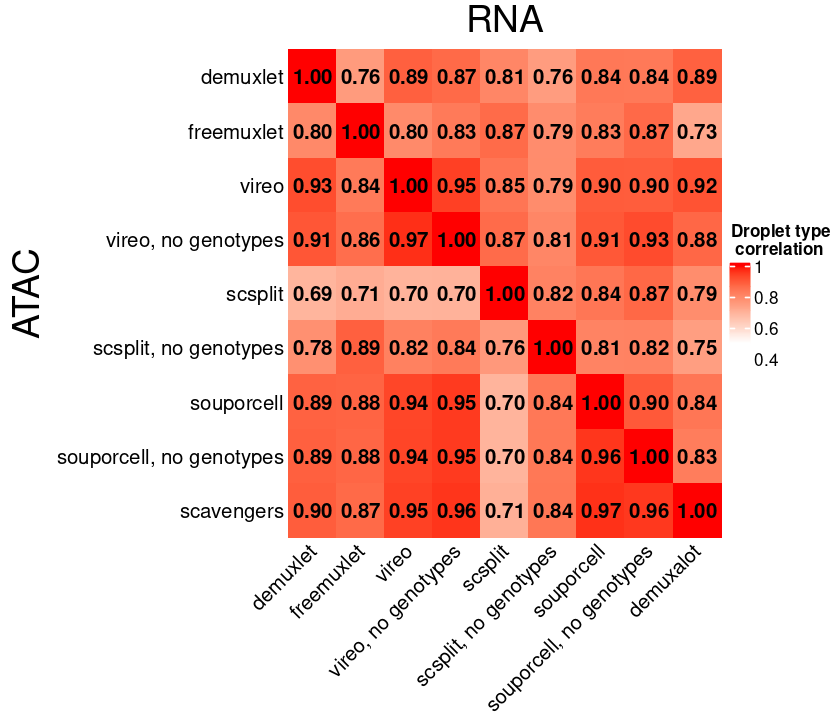

In [34]:
options(repr.plot.width=7, repr.plot.height=6)
cell_fun <- function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.2f", igvf_merged[i, j]), x, y, gp = gpar(fontsize = 12,
                                                                      fontface = 'bold'))}
igvf_heatmap <- Heatmap(igvf_merged,
                        name='Droplet type\n correlation',
                    row_names_side = "left",
                    column_names_side = "bottom",
                    col = colorRamp2(c(0.5, 1), c("white", "red")),
                    column_title = 'RNA',
                    row_title = 'ATAC',
                    show_heatmap_legend = TRUE,
                    show_column_names=TRUE,
                    show_row_names=TRUE,
                    row_title_gp = gpar(fontsize = 22),
                    column_title_gp = gpar(fontsize = 22),
                    column_names_rot = 45,
                    cell_fun = cell_fun,
                    heatmap_width = unit(15, "cm"),
                    heatmap_height = unit(15, "cm"),
                    cluster_rows = FALSE,
                    cluster_columns = FALSE)
igvf_heatmap

Warning message:
“The input is a data frame, convert it to a matrix.”


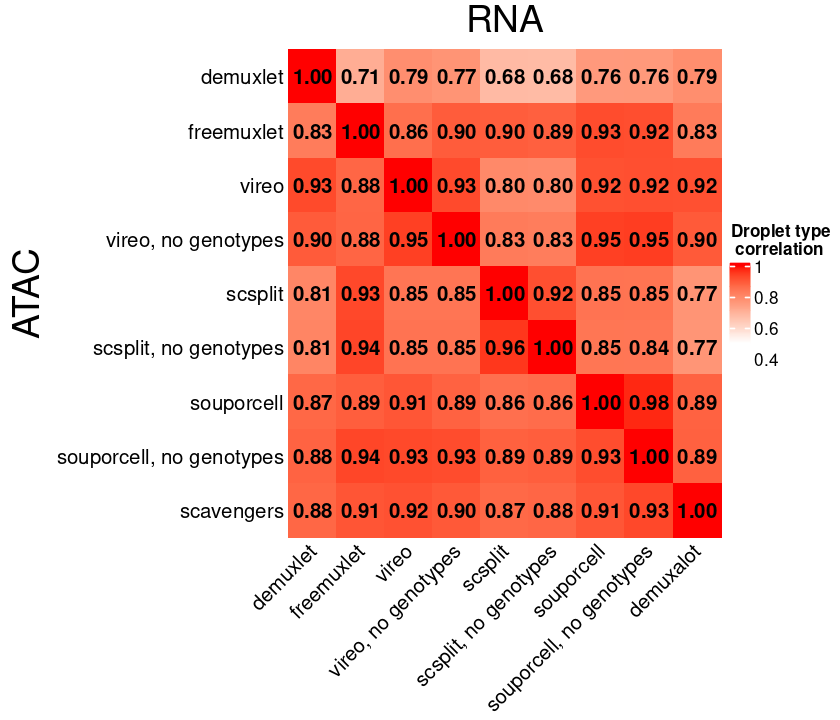

In [35]:
options(repr.plot.width=7, repr.plot.height=6)
cell_fun <- function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.2f", adelus_merged[i, j]), x, y, gp = gpar(fontsize = 12,
                                                                      fontface = 'bold'))}
adelus_heatmap <- Heatmap(adelus_merged,
                        name='Droplet type\n correlation',
                    row_names_side = "left",
                    column_names_side = "bottom",
                    col = colorRamp2(c(0.5, 1), c("white", "red")),
                    column_title = 'RNA',
                    row_title = 'ATAC',
                    show_heatmap_legend = TRUE,
                    show_column_names=TRUE,
                    show_row_names=TRUE,
                    row_title_gp = gpar(fontsize = 22),
                    column_title_gp = gpar(fontsize = 22),
                    column_names_rot = 45,
                    cell_fun = cell_fun,
                    heatmap_width = unit(15, "cm"),
                    heatmap_height = unit(15, "cm"),
                    cluster_rows = FALSE,
                    cluster_columns = FALSE)
adelus_heatmap